In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

In [5]:
crime=pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [6]:
crime.drop(crime.columns[[0]],axis=1,inplace=True)

In [26]:
x_scaled = scale(crime)

In [7]:
from sklearn.cluster import KMeans
wcss=[]
plt.figure(figsize=(10, 8))


<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

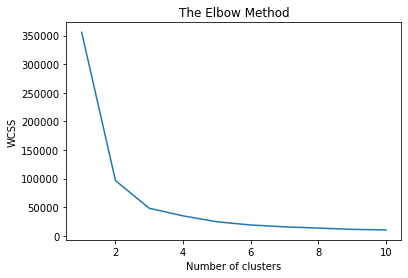

In [8]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(crime)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### By the graph we can decide that cluster can be 3

In [9]:
my_cluster=KMeans(3)
model=my_cluster.fit(crime)

In [10]:
cluster_labels=pd.Series(model.labels_)
cluster_labels

0     1
1     1
2     1
3     0
4     1
5     0
6     2
7     1
8     1
9     0
10    2
11    2
12    1
13    2
14    2
15    2
16    2
17    1
18    2
19    1
20    0
21    1
22    2
23    1
24    0
25    2
26    2
27    1
28    2
29    0
30    1
31    1
32    1
33    2
34    2
35    0
36    0
37    2
38    0
39    1
40    2
41    0
42    0
43    2
44    2
45    0
46    0
47    2
48    2
49    0
dtype: int32

In [11]:
crime['Cluster']=cluster_labels
crime=crime.iloc[:,]
crime

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,2
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,0


In [13]:
print(crime.iloc[:,1:].groupby(crime.Cluster).mean())

            Assault   UrbanPop       Rape  Cluster
Cluster                                           
0        173.285714  70.642857  22.842857        0
1        272.562500  68.312500  28.375000        1
2         87.550000  59.750000  14.390000        2


#### this is the interpretation of cluster with respect to mean of variable

#### hierarchical clustering

In [18]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [21]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')

In [27]:
y_hc = hc.fit_predict(x_scaled)

In [28]:
np.unique(y_hc, return_counts = True)

(array([0, 1, 2, 3], dtype=int64), array([20, 10, 13,  7], dtype=int64))

['Murder', 'Assault']


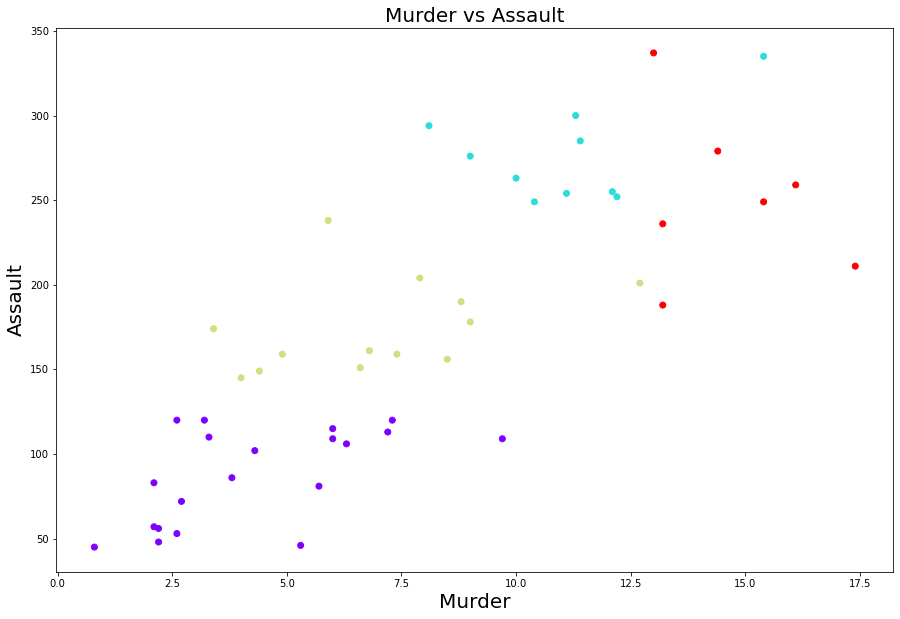

['Murder', 'UrbanPop']


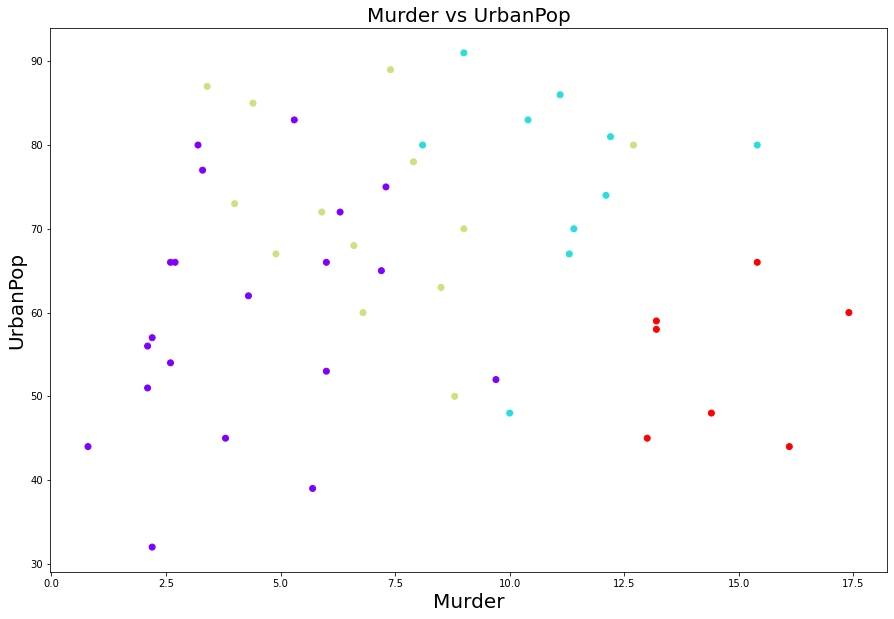

['Murder', 'Rape']


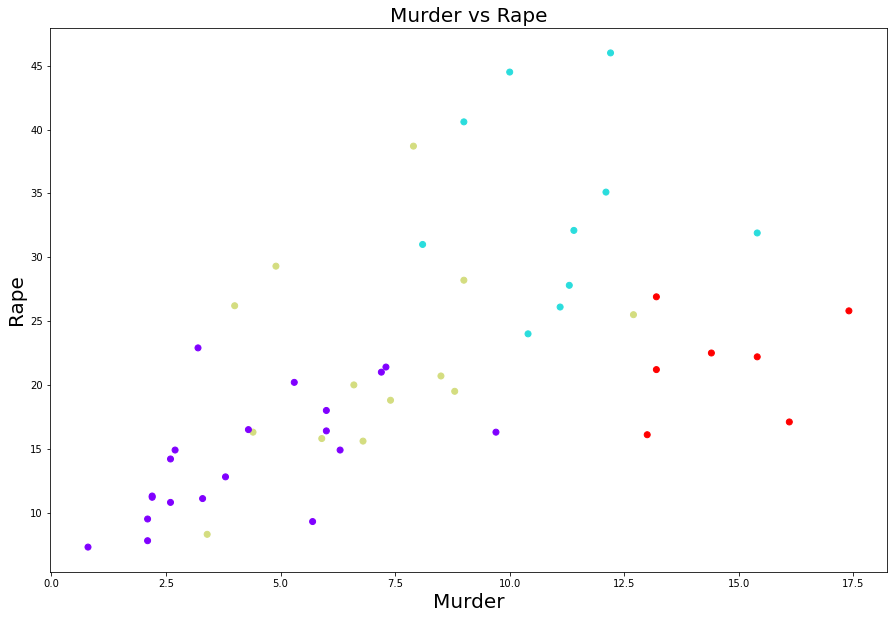

['Assault', 'UrbanPop']


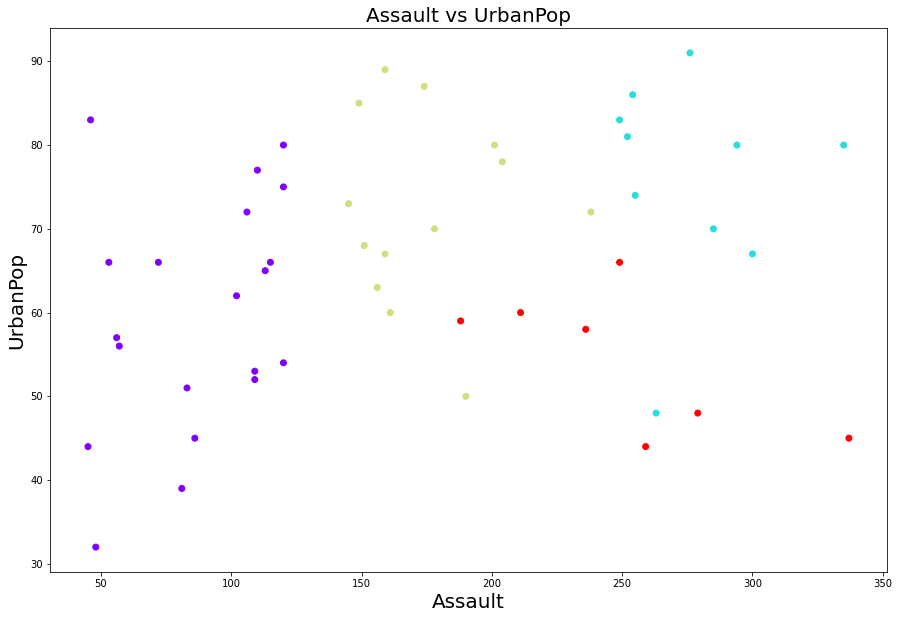

['Assault', 'Rape']


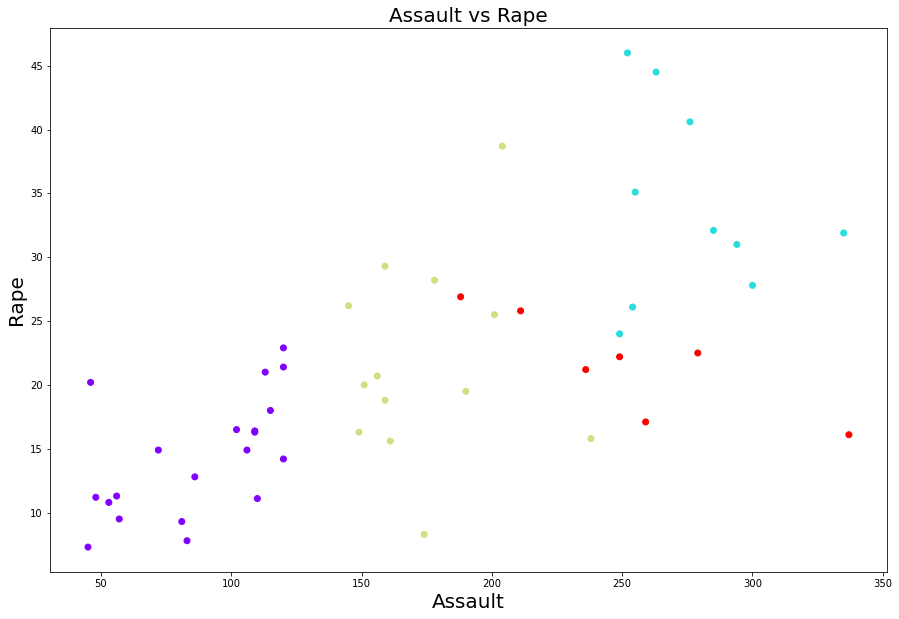

['UrbanPop', 'Rape']


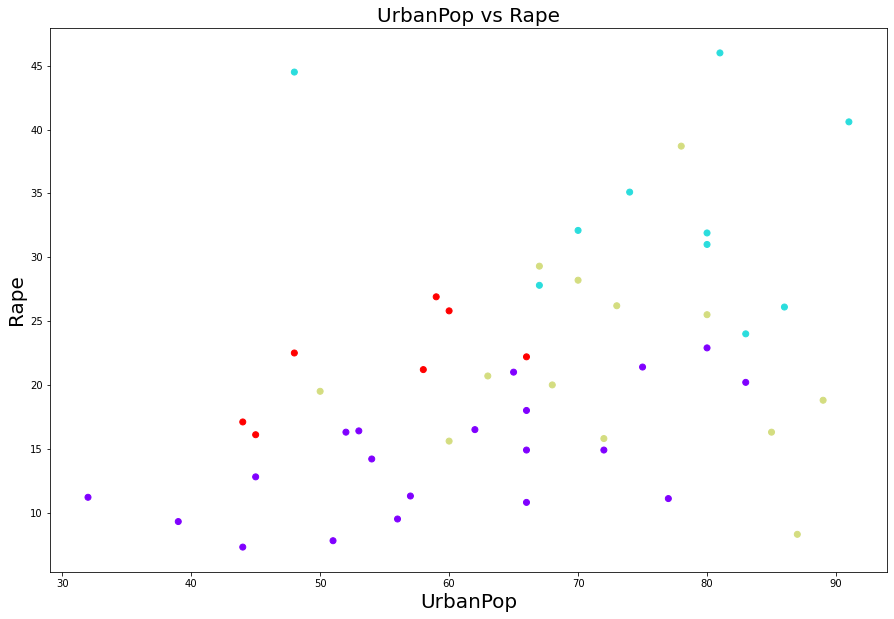

In [29]:
for i in itertools.combinations(clusters.columns[:-1],2):
    comb = list(i)
    print(comb)
    fig = plt.subplots(figsize = (15,10))
    plt.scatter(clusters[comb[0]], clusters[comb[1]], c= y_hc, cmap = 'rainbow')
    plt.xlabel(comb[0], fontsize = 20)
    plt.ylabel(comb[1], fontsize = 20)
    plt.title(comb[0] + ' ' + 'vs' + ' ' + comb[1], fontsize = 20)
    plt.show()

#### DBSCAN Clustering

In [30]:
from sklearn.cluster import DBSCAN

In [32]:
dbscan = DBSCAN(eps = 0.8, min_samples = 4)
dbscan.fit(x_scaled)

DBSCAN(eps=0.8, min_samples=4)

In [34]:
clusters_db = dbscan.fit_predict(x_scaled)

In [35]:
clusters_db_df = clusters.copy()
clusters_db_df['clusters'] = clusters_db

In [36]:
np.unique(clusters_db_df['clusters'], return_counts = True)

(array([-1,  0], dtype=int64), array([36, 14], dtype=int64))

['Murder', 'Assault']


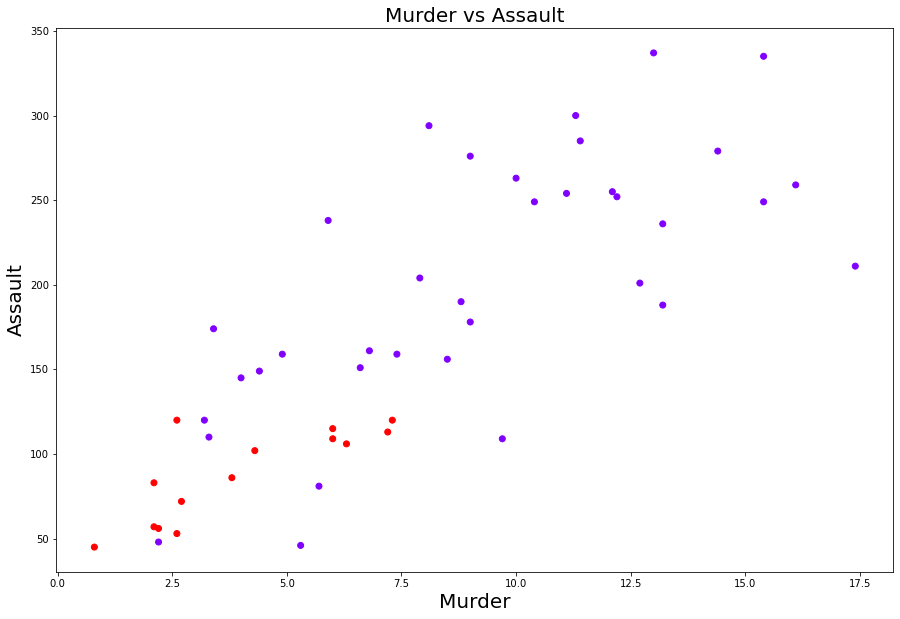

['Murder', 'UrbanPop']


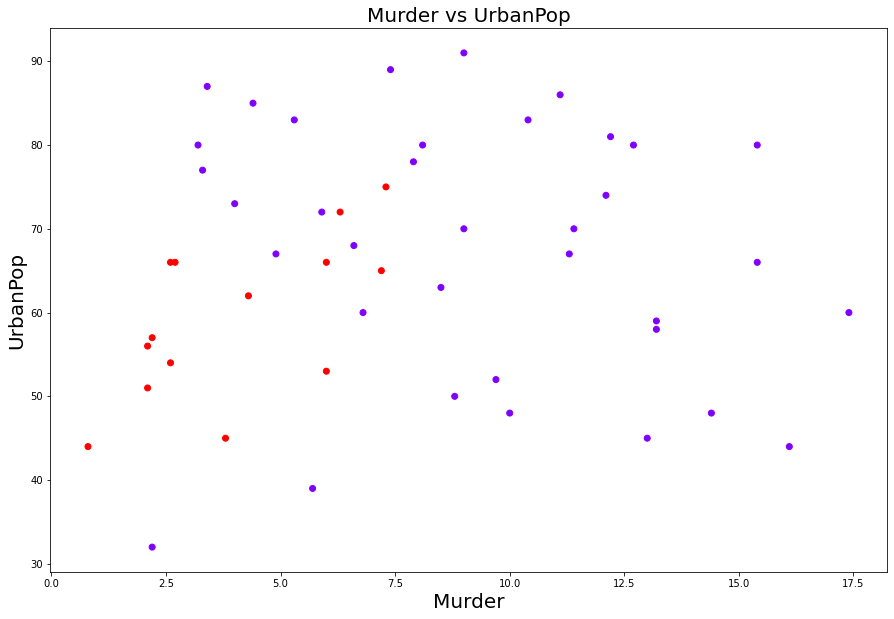

['Murder', 'Rape']


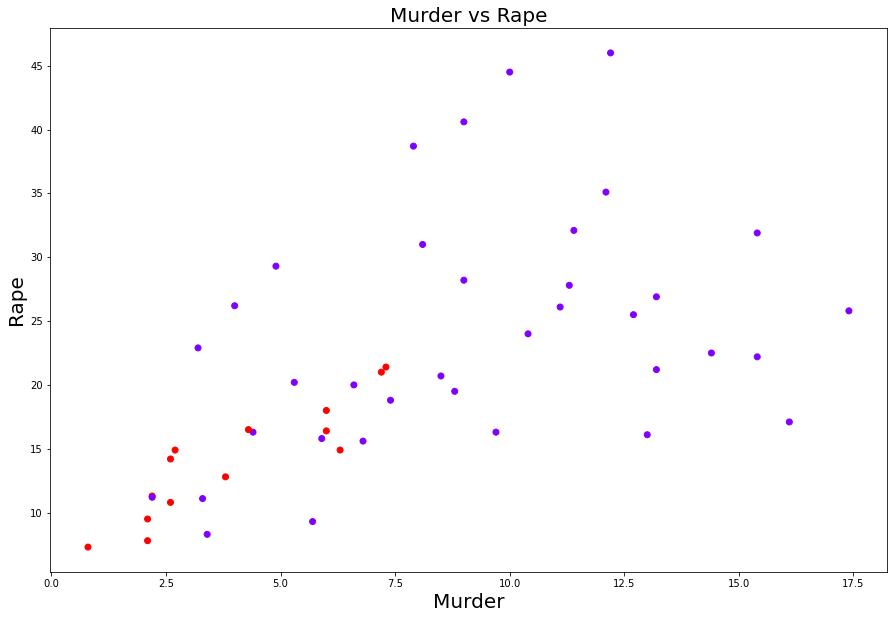

['Murder', 'Cluster']


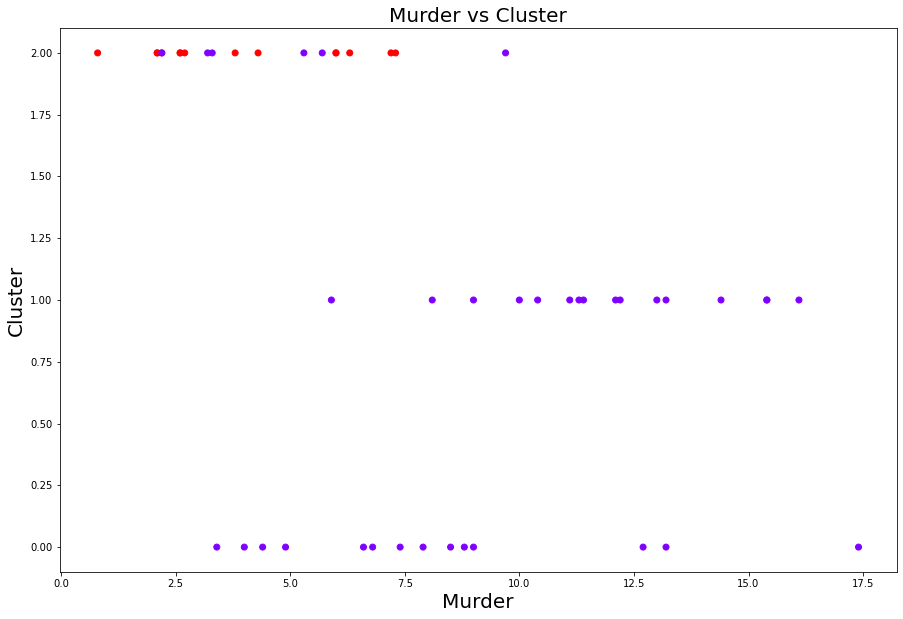

['Assault', 'UrbanPop']


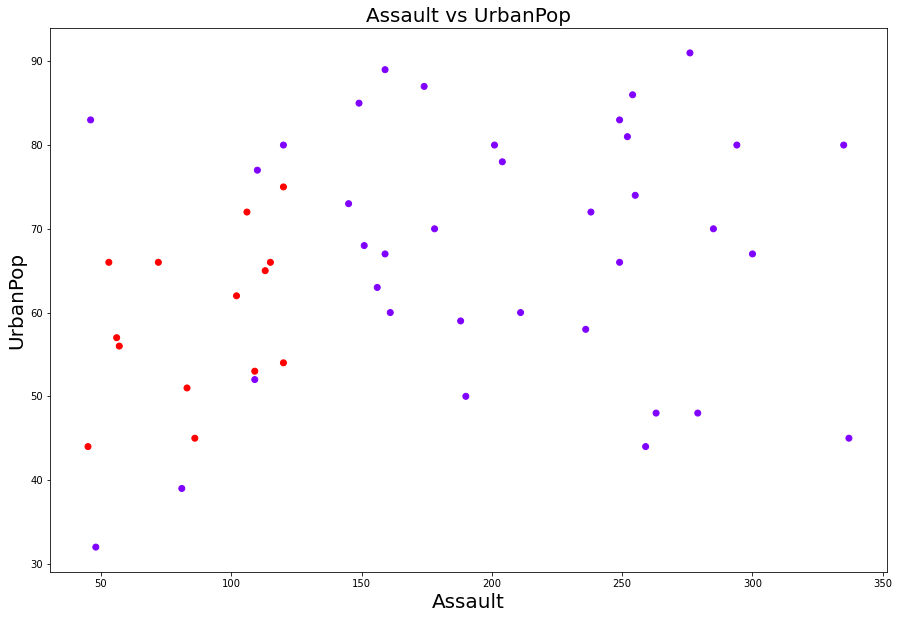

['Assault', 'Rape']


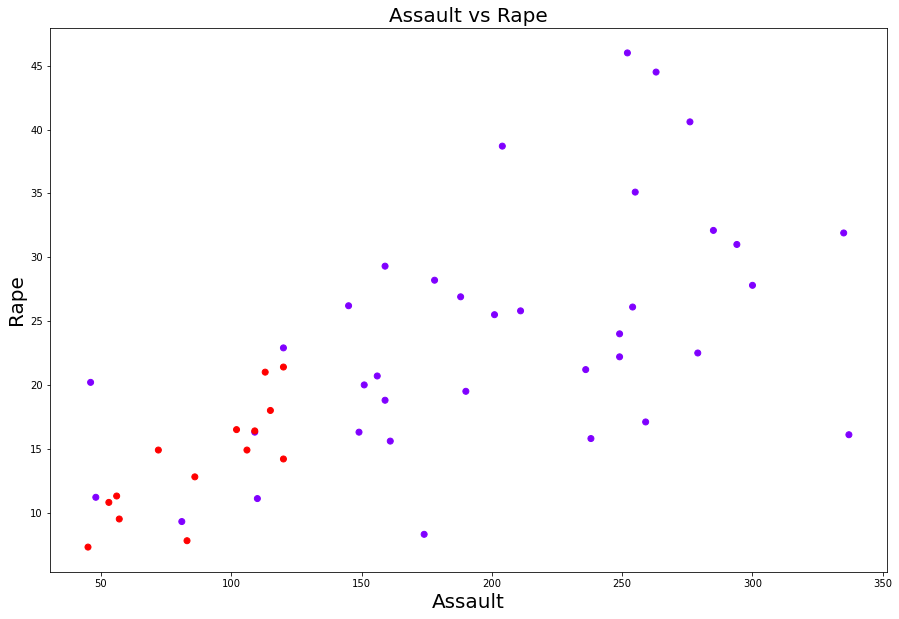

['Assault', 'Cluster']


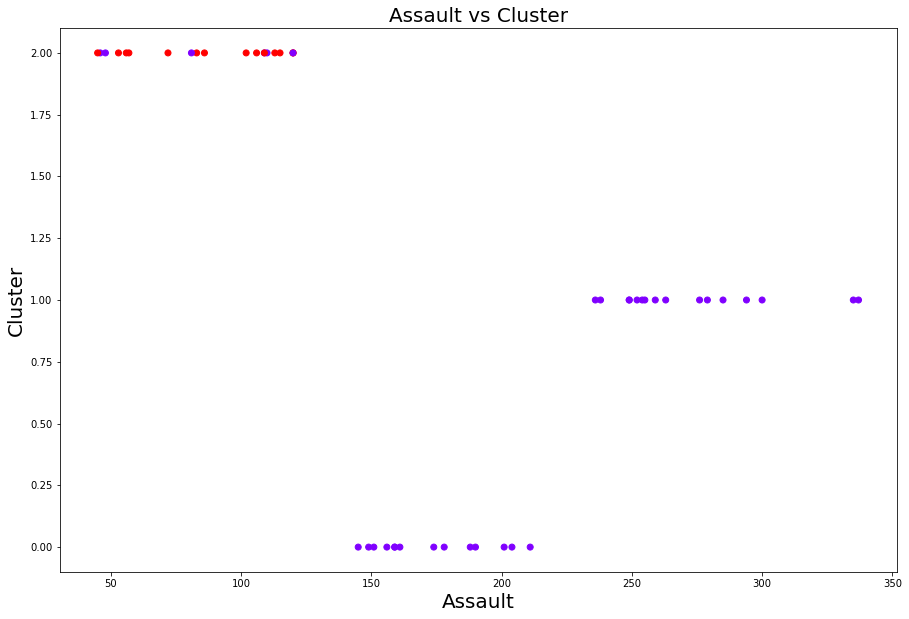

['UrbanPop', 'Rape']


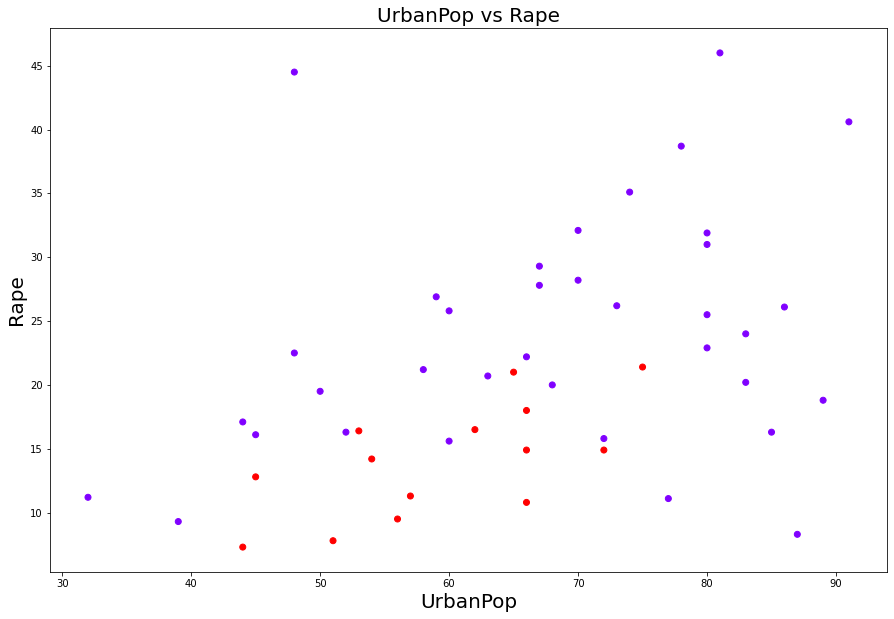

['UrbanPop', 'Cluster']


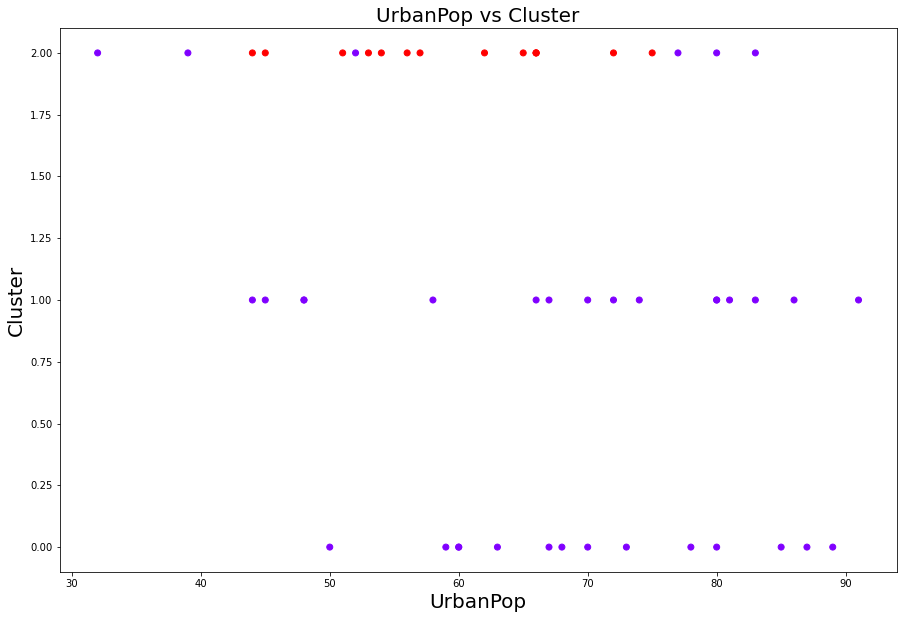

['Rape', 'Cluster']


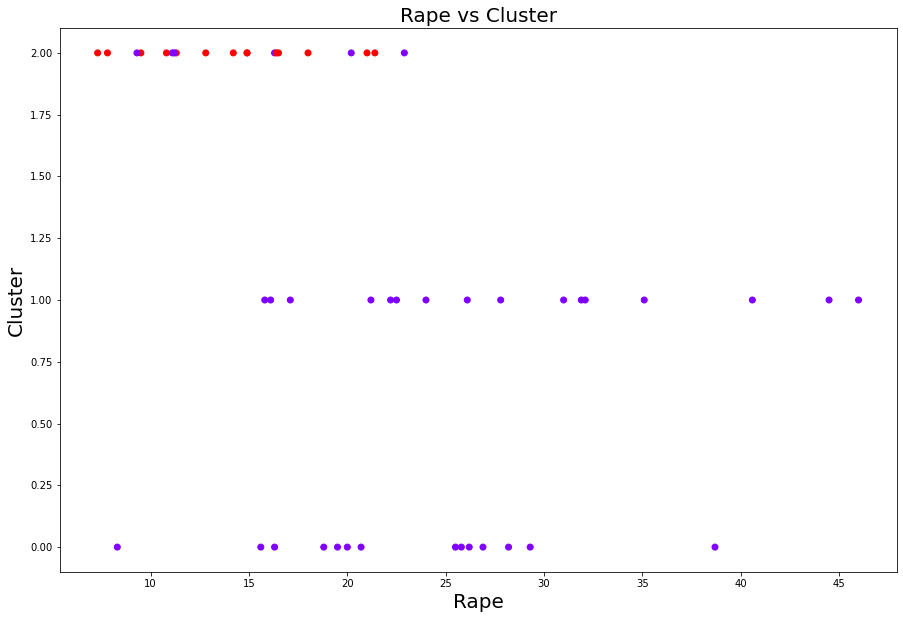

In [37]:
for i in itertools.combinations(clusters_db_df.columns[:-1],2):
    comb = list(i)
    print(comb)
    fig = plt.subplots(figsize = (15,10))
    plt.scatter(clusters_db_df[comb[0]], clusters_db_df[comb[1]], c= clusters_db_df['clusters'], cmap = 'rainbow')
    plt.xlabel(comb[0], fontsize = 20)
    plt.ylabel(comb[1], fontsize = 20)
    plt.title(comb[0] + ' ' + 'vs' + ' ' + comb[1], fontsize = 20)
    plt.show()

# Clustering for airline data

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
air=pd.read_excel('EastWestAirlines.xlsx',sheet_name=1)
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [41]:
air.drop(air.columns[[0]],axis=1,inplace=True)
air


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [42]:
x_scaled=scale(air)

In [43]:
air.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [44]:
from sklearn import *
def norm_func(i):
    x = (i-i.min())	/	(i.max()	-	i.min())
    return (x)

In [45]:
air_norm=norm_func(air)
air_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [46]:
from sklearn.cluster import KMeans
wcss=[]

### For Cluster number

In [47]:
plt.figure(figsize=(10, 8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

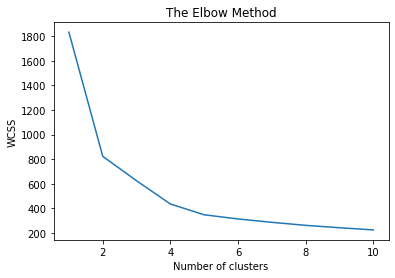

In [48]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(air_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### The number of Cluster is 5

In [49]:
my_clust=KMeans(5)
model=my_clust.fit(air_norm)
cluster=model.labels_
cluster

array([1, 1, 1, ..., 0, 4, 4])

In [50]:
cluster_labels=pd.Series(model.labels_)
cluster_labels

0       1
1       1
2       1
3       1
4       0
       ..
3994    2
3995    2
3996    0
3997    4
3998    4
Length: 3999, dtype: int32

In [75]:
air['Cluster']=cluster_labels
air=air.iloc[:,]
air

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,CLuster,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,1,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0
5,16420,0,1,1,1,0,0,0,0,6942,0,1,1
6,84914,0,3,1,1,27482,25,0,0,6994,0,3,3
7,20856,0,1,1,1,5250,4,250,1,6938,1,2,2
8,443003,0,3,2,1,1753,43,3850,12,6948,1,0,0
9,104860,0,3,1,1,28426,28,1150,3,6931,1,0,0


In [52]:
pd.set_option('display.max_rows',None)
air
air.head(500)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,CLuster
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
5,16420,0,1,1,1,0,0,0,0,6942,0,1
6,84914,0,3,1,1,27482,25,0,0,6994,0,3
7,20856,0,1,1,1,5250,4,250,1,6938,1,2
8,443003,0,3,2,1,1753,43,3850,12,6948,1,0
9,104860,0,3,1,1,28426,28,1150,3,6931,1,0


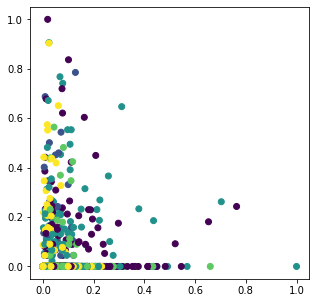

In [53]:
plt.figure(figsize=(5, 5))
plt.scatter(air_norm['Balance'], air_norm['Qual_miles'], c=cluster)  
plt.show()

#### Hierarchical Clustering

In [54]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')

In [55]:
y_hc = hc.fit_predict(x_scaled)

In [56]:
np.unique(y_hc, return_counts = True)

(array([0, 1, 2, 3], dtype=int64),
 array([1380, 2446,  130,   43], dtype=int64))

##### DBSCAN Clustering

In [59]:
from sklearn.cluster import DBSCAN

In [67]:
dbscan = DBSCAN(eps = 1, min_samples = 4)
dbscan.fit(x_scaled)

DBSCAN(eps=1, min_samples=4)

In [68]:
clusters_db = dbscan.fit_predict(x_scaled)

In [71]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [76]:
crime.groupby('Cluster').agg(['mean']).reset_index()

,Cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,8.214286,173.285714,70.642857,22.842857
1,1,11.812500,272.562500,68.312500,28.375000
2,2,4.270000,87.550000,59.750000,14.390000
